# Задание 4

## РЕШЕНИЕ ЗАДАЧИ МНОГОМЕРНОЙ РЕГРЕССИИ

**Цель работы:** изучение принципов решения задачи многомерной регрессии с использованием методов машинного обучения.

**Основные задачи:**
- изучение инструментария Python для реализации алгоритмов многомерной
регрессии;
- освоение метода линейной регрессии;
- изучение методов оценки корректности модели многомерной линейной
регрессии;

**Задание:** Вариант 9 – Экономика и безработица

Датасет – x21.csv.
Этот набор содержит некоторые данные по экономике и безработице.

**Атрибуты:**
- I – индекс;
- A1 – процент дефляции цен;
- A2 – ВНП в миллионах долларов;
- A3 – число безработных в тысячах;
- A4 – количество людей, занятых в вооруженных силах;
- A5 – количество людей старше 14 лет;
- A6 – год;
- B – количество занятых людей.

## 1. Загрузим набор данных как датафрейм библиотеки pandas. Используем набор данных для задания 4.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('x21.csv')

## 2. Получим представлении о наборе данных с помощью методов shape, head, describe, info библиотеки pandas.

In [2]:
print(df.shape)      # количество строк и столбцов

(16, 8)


In [3]:
print(df.head())     # первые 5 строк таблицы

   Number    A1      A2    A3    A4      A5    A6      B
0       1  83.0  234289  2356  1590  107608  1947  60323
1       2  88.5  259426  2326  1456  108632  1948  61122
2       3  88.2  258054  3682  1616  109773  1949  60171
3       4  89.5  284599  3351  1650  110929  1950  61187
4       5  96.2  328975  2099  3099  112075  1951  63221


In [4]:
print(df.describe()) # статистика по числовым столбцам

          Number          A1             A2           A3           A4  \
count  16.000000   16.000000      16.000000    16.000000    16.000000   
mean    8.500000  101.681250  387698.437500  3193.375000  2606.687500   
std     4.760952   10.791553   99394.937795   934.402331   695.919604   
min     1.000000   83.000000  234289.000000  1870.000000  1456.000000   
25%     4.750000   94.525000  317881.000000  2348.500000  2298.000000   
50%     8.500000  100.600000  381427.000000  3143.500000  2717.500000   
75%    12.250000  111.250000  454085.500000  3842.500000  3060.750000   
max    16.000000  116.900000  554894.000000  4806.000000  3594.000000   

                  A5           A6            B  
count      16.000000    16.000000     16.00000  
mean   117424.000000  1954.500000  65317.62500  
std      6956.101561     4.760952   3512.96266  
min    107608.000000  1947.000000  60171.00000  
25%    111788.500000  1950.750000  62712.50000  
50%    116803.500000  1954.500000  65504.00000  

In [6]:
print(df.info())     # информация о типах данных и пропусках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Number  16 non-null     int64  
 1   A1      16 non-null     float64
 2   A2      16 non-null     int64  
 3   A3      16 non-null     int64  
 4   A4      16 non-null     int64  
 5   A5      16 non-null     int64  
 6   A6      16 non-null     int64  
 7   B       16 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 1.1 KB
None


In [7]:
print(df.isnull().sum())

Number    0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
B         0
dtype: int64


Пропущенные значения отсутствуют, следовательно пропускаем пункт с заполнением пропусков.

## 3. Исключаем невлияющие категориальные признаки

В нашем случае нет необходимости удалять категориальные признаки, так как все признаки являются количественными.

## 4. Разделяем данные на признаки и целевую переменную

In [10]:
df_copy = df.copy()

y = df_copy['B']
X = df_copy.drop('B', axis=1)

type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [11]:
print("Целевая переменная (y):")
print(y.head())

print("\nПризнаки (X):")
print(X.head())

Целевая переменная (y):
0    60323
1    61122
2    60171
3    61187
4    63221
Name: B, dtype: int64

Признаки (X):
   Number    A1      A2    A3    A4      A5    A6
0       1  83.0  234289  2356  1590  107608  1947
1       2  88.5  259426  2326  1456  108632  1948
2       3  88.2  258054  3682  1616  109773  1949
3       4  89.5  284599  3351  1650  110929  1950
4       5  96.2  328975  2099  3099  112075  1951


## 5. Разделяем данные на обучающую и тестовую выборку

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 6. Применяем операцию нормализации для численной устойчивости

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
scaler

,copy,True
,with_mean,True
,with_std,True


## 7. Масштабируем признаки обучающей выборки

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
scaler.mean_, scaler.scale_

(array([9.00000000e+00, 1.02800000e+02, 3.96809583e+05, 3.43100000e+03,
        2.56658333e+03, 1.18244667e+05, 1.95500000e+03]),
 array([4.91596040e+00, 1.13363721e+01, 1.03744835e+05, 8.98782046e+02,
        6.31108741e+02, 7.26454144e+03, 4.91596040e+00]))

## 8. Обучаем модель линейной регрессии

In [16]:
model = LinearRegression().fit(X_train_scaled, y_train)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 9. Делаем прогноз на основе данных тестирования

In [18]:
X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_scaled)
y_pred[:5]

array([61839.83897718, 65141.02398709, 65254.02284634, 66922.15879289])

In [19]:
from sklearn.metrics import root_mean_squared_error

print('Root Mean Squared Error (RMSE):', root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 706.6686313171508


In [20]:
from sklearn.metrics import r2_score
print('R2:', np.round(r2_score(y_test, y_pred), 2))

R2: 0.92


In [21]:
model.score(X_test_scaled, y_test)

0.9175931953425338

## 10. Итоговое уравнение

In [22]:
print ('Coefficients: ', model.coef_)

Coefficients:  [ 3034.75426164  2916.92120651 -6826.71486462 -2063.46420645
  -731.0575212   3118.35614227  3034.75426164]


In [23]:
print ('Intercept: ', model.intercept_)

Intercept:  65424.583333333336


## 11. Оценим влияние признаков на целевую переменную

Пропускаем этап заполнения пропусков и изменения категориальных признаков на исходном датасете, потому что для нашего варианта это не требуется

In [24]:
df.corr()

,Number,A1,A2,A3,A4,A5,A6,B
Number,1.000000,0.991149,0.995273,0.668203,0.417245,0.993953,1.000000,0.971353
A1,0.991149,1.000000,0.991589,0.620587,0.464744,0.979163,0.991149,0.970891
A2,0.995273,0.991589,1.000000,0.604209,0.446437,0.991090,0.995273,0.983592
A3,0.668203,0.620587,0.604209,1.000000,-0.177550,0.686507,0.668203,0.502469
A4,0.417245,0.464744,0.446437,-0.177550,1.000000,0.364416,0.417245,0.457238
A5,0.993953,0.979163,0.991090,0.686507,0.364416,1.000000,0.993953,0.960464
A6,1.000000,0.991149,0.995273,0.668203,0.417245,0.993953,1.000000,0.971353
B,0.971353,0.970891,0.983592,0.502469,0.457238,0.960464,0.971353,1.000000


## 12.Визуализация результатов регрессии

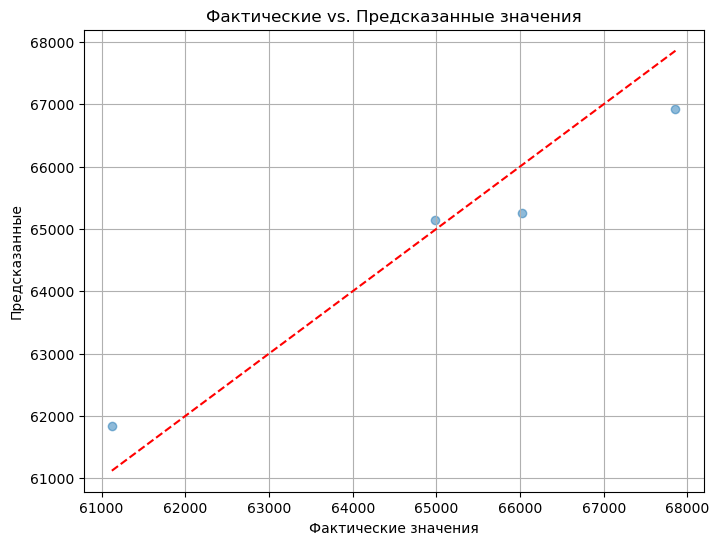

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные")
plt.title("Фактические vs. Предсказанные значения")
plt.grid()
plt.show()

## 13.Остатки регресии

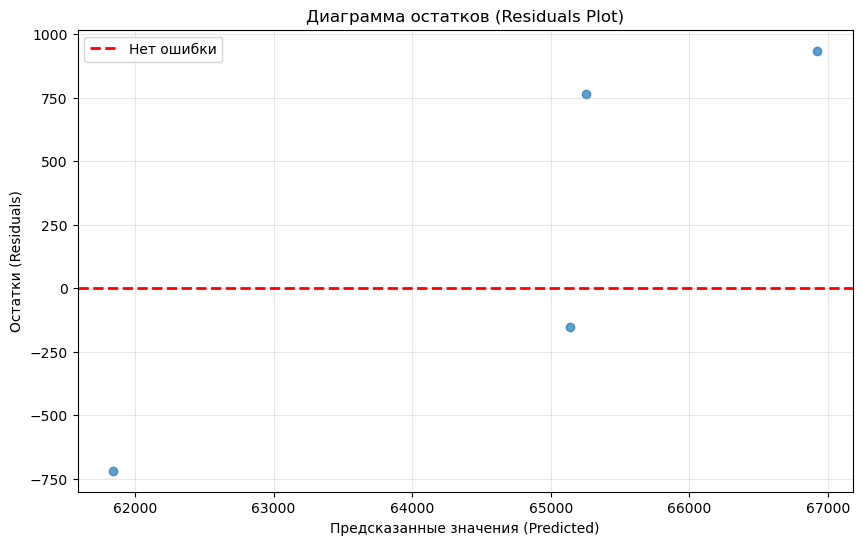

In [30]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel('Предсказанные значения (Predicted)')
plt.ylabel('Остатки (Residuals)')
plt.title('Диаграмма остатков (Residuals Plot)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()